In [1]:
#マウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##作業するディレクトリを指定する.
%cd '/content/drive/MyDrive/Colab_Notebooks/arXiv_data'

/content/drive/MyDrive/Colab_Notebooks/arXiv_data


In [3]:
#関係するツールの導入
import os
import numpy as np
import pandas as pd
import collections
import re
from string import digits

import sys
import time

In [4]:
#input_folder_path: 入力となるファイルの保存場所
input_folder_path ='/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_6'
#output_folder_path: 出力となるpdfファイルの保存場所
output_folder_path = '/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_7'

In [5]:
#モジュール
module_path = '/content/drive/My Drive/Colab_Notebooks/arXiv_data/module/'
os.chdir(module_path)
import file_processing

In [6]:
file_names_list = file_processing.read_file_to_list(input_folder_path + "/" + 'k_means_id_list_10_20_sub.txt')

In [7]:
file_names_list

['0704.2723',
 '0704.3127',
 '0704.3443',
 '0704.3752',
 '0705.0118',
 '0705.1316',
 '0705.2332',
 '0705.2522',
 '0705.3087',
 '0705.3860',
 '0704.1446',
 '0704.1543',
 '0704.1673',
 '0704.1807',
 '0704.1851',
 '0704.1986',
 '0704.2081',
 '0704.2119',
 '0704.2152',
 '0704.2646',
 '0704.1208',
 '0704.1349',
 '0704.1352',
 '0704.1372',
 '0704.1861',
 '0704.1862',
 '0704.1954',
 '0704.2031',
 '0704.2104',
 '0704.2359']

In [8]:
len(file_names_list)

30

In [9]:
df = pd.read_csv(input_folder_path + "/rate_data_k_meansfiles__100_paper_10_100_100.csv")
df = df.drop('Unnamed: 0', axis=1)

##クラスタリングの前準備

In [10]:
#正規化
def minmax_norm(list_input):
    return (list_input - list_input.min()) / ( list_input.max() - list_input.min())

K-平均法

In [11]:
#k平均法に必要なパッケージ
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np

In [12]:
#クラスタリングの結果からfile名をクラスタごとに分ける
# show_result (str_list,int_array,int) -> str_list_list
def show_result (file, result_k,n):
  result_file = []
  for i in range(n):
    result_file.append([])
  for j in range(len(file)):
    l = result_k[j]
    result_file[l].append(file[j])
  #return print(result_file)
  return result_file

In [13]:
#傾向となる単語を取りだす
#df: データ k_means_result:k-means法でクラスタリングした結果, n:クラスタリングの個数
def trend (df,k_means_result,n,m,dictionary):
  trend = []
  df['cluster_id']=k_means_result
  for i in range(n):
    trend_n = df[df['cluster_id']==i].mean()
    trend_number = trend_n.drop('cluster_id', axis=0)
    trend_word = trend_number.sort_values(ascending = False)[0:m].index
    trend.append((i,trend_word))
  #return print(trend)
  return trend

階層的クラスタリング

In [14]:
#階層的クラスタリングに必要なパッケージ
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [15]:
def plot_dendrogram(model, **kwargs):
   # Create linkage matrix and then plot the dendrogram

   # create the counts of samples under each node
    #要素の値が全てゼロの配列を作成する
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
         if child_idx < n_samples:
            current_count += 1 # leaf node
         else:
            current_count += counts[child_idx - n_samples]
      counts[i] = current_count

   linkage_matrix = np.column_stack([model.children_, model.distances_,
counts]).astype(float)

   # Plot the corresponding dendrogram
   #dendrogram(linkage_matrix, **kwargs,labels = file_names_list,leaf_rotation=90 )#, orientation='left')
   dendrogram(linkage_matrix, **kwargs,labels = file_names_list, orientation='left')

In [16]:
df

,permitting,lamination,multiplicative,algebra,nondegenerate,indecomposable,koszul,algebras,laminations,azumaya,discrete,novikov,spacetimes,kukl,division,xixi,rhomr,hyperbolic,earthquake,cahn,algebroid,geodesic,crossed,composition,earthquakes,strongly,graded,korteweg,francesco,dxdt,quaternion,jordan,degree,vera,every,superalgebra,subalgebra,mart,solvable,exists,...,severi,separable,cubic,homological,epimorphisms,suppose,siegel,wick,galois,boundary,abelian,norm,hence,brauer,prove,corollary,monomials,matthias,operator,parabolic,deﬁne,quadratic,remark,groupoids,isometric,obtain,math,prime,holonomy,regularity,radon,rescaling,diego,lagrangian,ahler,grafting,albert,subﬁeld,denote,estimate
0,-0.112259,-0.134672,-0.344515,34.833502,-0.226736,-0.236946,-0.153201,57.872810,-0.091659,-0.097988,-0.740400,-0.181124,-0.299362,-0.088325,-0.315731,-0.086802,-0.093103,-0.498526,-0.100341,-0.101333,-0.168142,-0.490434,-0.290430,-0.552583,-0.088702,49.357987,-0.492673,-0.100008,-0.110463,-0.134175,-0.137610,-0.320448,-1.085878,-0.085642,37.133097,-0.219109,193.980634,-0.235110,247.736786,3.919295,...,-0.091659,-0.395602,-0.460127,-0.189753,-0.083673,8.165242,-0.164938,-0.190104,-0.300362,-1.270781,46.269192,-0.648482,4.655587,-0.177404,9.271655,1.439636,-0.256149,-0.104571,-1.333053,-0.402867,-1.276598,-0.638689,-0.892083,-0.228202,-0.271810,1.859003,4.571365,3.077211,-0.254975,-0.351035,-0.175894,-0.263084,-0.184226,-0.725429,-0.465387,-0.093816,-0.211521,-0.112556,0.376980,-1.020722
1,-0.156092,-0.187255,-0.479035,38.554376,31.404371,-0.329464,-0.213021,10.641297,-0.127448,-0.136248,-1.029496,-0.251845,-0.416250,-0.122812,86.121933,-0.120695,-0.129456,-0.693181,-0.139520,-0.140900,-0.233794,-0.681929,-0.403831,-0.768345,-0.123336,-1.109155,85.448214,-0.139058,-0.153594,-0.186566,83.429367,13.020786,3.128147,-0.119082,1.817224,203.202930,21.528320,-0.326911,-0.437246,13.636190,...,-0.127448,4.904092,-0.639788,-0.263844,-0.116344,10.329584,-0.229340,-0.264333,1.976828,-1.766969,-0.918619,1.316690,17.536232,44.347246,3.250228,8.748486,-0.356165,-0.145402,-1.853557,-0.560171,6.680050,20.509580,14.081308,-0.317306,-0.377941,0.816984,-0.814331,12.281221,-0.354532,-0.488100,-0.244574,-0.365807,-0.256159,-1.008680,-0.647101,-0.130448,71.108314,-0.156504,2.925383,-1.419272
2,-0.121142,-0.145328,-0.371776,54.879485,-0.244677,7.566269,-0.165324,46.969257,-0.098912,151.207589,-0.798985,-0.195455,-0.323049,-0.095314,34.880616,-0.093670,-0.100470,-0.537973,-0.108281,-0.109351,-0.181446,-0.529241,-0.313411,-0.596307,-0.095720,-0.860808,-0.531656,-0.107922,-0.119203,-0.144792,60.458459,-0.345804,44.929613,-0.092419,1.702327,-0.236446,1.948029,-0.253714,-0.339344,12.111708,...,70.671404,27.683947,-0.496535,-0.204768,-0.090294,14.010817,-0.177989,-0.205147,42.869883,-1.371333,-0.712934,-0.699794,-0.325117,52.044457,0.592660,6.546106,-0.276417,-0.112846,-1.438533,-0.434745,8.790543,15.272921,2.154504,-0.246259,-0.293317,2.737537,-0.086321,43.116456,-0.275150,-0.378811,-0.189812,-0.283900,-0.198803,-0.782829,-0.502211,-0.101239,8.533873,16.344681,3.903298,-1.101488
3,-0.163241,-0.195832,-0.500977,53.093759,-0.329708,-0.344555,300.527839,46.414801,-0.133286,-0.142489,-1.076651,-0.263381,-0.435316,-0.128438,-0.459120,-0.126223,-0.135385,-0.724931,-0.145911,-0.147353,-0.244503,-0.713164,-0.422328,0.441087,-0.128985,-1.159959,81.644381,-0.145427,-0.160629,-0.195111,-0.200106,-0.465979,37.067803,-0.124536,5.513690,-0.318617,4.707722,2.583130,-0.457274,1.792578,...,-0.133286,-0.575263,0.825577,17.844860,-0.121673,6.259115,-0.239845,-0.276440,-0.436771,-1.306453,-0.960695,-0.942989,4.415064,-0.257972,6.852398,3.498114,15.736198,-0.152062,-1.938457,-0.585829,6.767416,10.916792,1.016040,-0.331839,-0.395252,-1.709813,1.089501,-0.801605,-0.370771,3.407769,-0.255776,-0.382563,-0.267892,-1.054881,-0.676741,-0.136423,-0.307584,-0.163673,3.198449,-1.484281
4,-0.107404,-0.128846,-0.329614,3.576380,-0.216929,-0.226698,-0.146575,5.323126,-0.087695,-0.093749,-0.708375,-0.173289,-0.2

##データの加工

In [17]:
#各単語に対して正規化をする．
df_minmax_norm = df.apply(minmax_norm)

##K-means法

In [18]:
number_cluster = 5

In [19]:
#k-means
result = KMeans(n_clusters= number_cluster ).fit_predict(df_minmax_norm)

In [20]:
show_result(file_names_list,result,number_cluster)

[['0704.2723',
  '0704.3752',
  '0705.0118',
  '0705.1316',
  '0705.2332',
  '0704.1446',
  '0704.1673',
  '0704.1807',
  '0704.1851',
  '0704.1986',
  '0704.2081',
  '0704.2119',
  '0704.2646',
  '0704.1208',
  '0704.1349',
  '0704.1352',
  '0704.1372',
  '0704.1861',
  '0704.1862',
  '0704.1954',
  '0704.2031',
  '0704.2104',
  '0704.2359'],
 ['0705.2522', '0705.3087'],
 ['0704.2152'],
 ['0704.3127', '0704.3443', '0705.3860'],
 ['0704.1543']]

In [21]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,number_cluster,10,df_minmax_norm.columns)

[(0,
  Index(['novikov', 'rhomr', 'kukl', 'koszul', 'korteweg', 'vera', 'finsler',
         'solvable', 'vries', 'cahn'],
        dtype='object')),
 (1, Index(['permitting', 'multiplicative', 'nondegenerate', 'indecomposable',
         'composition', 'jordan', 'strongly', 'forms', 'absolutely', 'cubic'],
        dtype='object')),
 (2,
  Index(['lamination', 'laminations', 'spacetimes', 'earthquake', 'earthquakes',
         'francesco', 'geodesic', 'hyperbolic', 'spacelike', 'wick'],
        dtype='object')),
 (3,
  Index(['division', 'crossed', 'superalgebra', 'severi', 'azumaya', 'etale',
         'galois', 'brauer', 'quaternion', 'indecomposable'],
        dtype='object')),
 (4,
  Index(['discrete', 'algebroid', 'mart', 'iglesias', 'groupoid', 'lagrangian',
         'diego', 'groupoids', 'vector', 'nondegenerate'],
        dtype='object'))]

##階層的クラスタリング

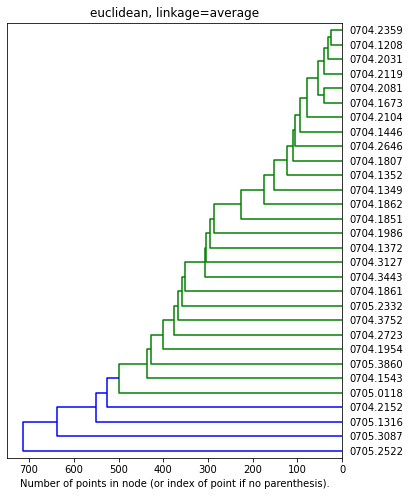

In [22]:
parm_affinity = 'euclidean'
param_linkage = 'average'
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity= parm_affinity,
linkage= param_linkage, 
distance_threshold=0,
n_clusters=None)
model = model.fit(df)
fig = plt.figure( figsize=(6,8))
plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.figure(figsize=(6, 8), dpi=300)
  #fig.savefig("dendrogram.pdf")
fig.savefig( output_folder_path + "/dendrogram_z_euclidean_mean_sub.pdf", bbox_inches='tight')
plt.show()

In [23]:
df

,permitting,lamination,multiplicative,algebra,nondegenerate,indecomposable,koszul,algebras,laminations,azumaya,discrete,novikov,spacetimes,kukl,division,xixi,rhomr,hyperbolic,earthquake,cahn,algebroid,geodesic,crossed,composition,earthquakes,strongly,graded,korteweg,francesco,dxdt,quaternion,jordan,degree,vera,every,superalgebra,subalgebra,mart,solvable,exists,...,separable,cubic,homological,epimorphisms,suppose,siegel,wick,galois,boundary,abelian,norm,hence,brauer,prove,corollary,monomials,matthias,operator,parabolic,deﬁne,quadratic,remark,groupoids,isometric,obtain,math,prime,holonomy,regularity,radon,rescaling,diego,lagrangian,ahler,grafting,albert,subﬁeld,denote,estimate,cluster_id
0,-0.112259,-0.134672,-0.344515,34.833502,-0.226736,-0.236946,-0.153201,57.872810,-0.091659,-0.097988,-0.740400,-0.181124,-0.299362,-0.088325,-0.315731,-0.086802,-0.093103,-0.498526,-0.100341,-0.101333,-0.168142,-0.490434,-0.290430,-0.552583,-0.088702,49.357987,-0.492673,-0.100008,-0.110463,-0.134175,-0.137610,-0.320448,-1.085878,-0.085642,37.133097,-0.219109,193.980634,-0.235110,247.736786,3.919295,...,-0.395602,-0.460127,-0.189753,-0.083673,8.165242,-0.164938,-0.190104,-0.300362,-1.270781,46.269192,-0.648482,4.655587,-0.177404,9.271655,1.439636,-0.256149,-0.104571,-1.333053,-0.402867,-1.276598,-0.638689,-0.892083,-0.228202,-0.271810,1.859003,4.571365,3.077211,-0.254975,-0.351035,-0.175894,-0.263084,-0.184226,-0.725429,-0.465387,-0.093816,-0.211521,-0.112556,0.376980,-1.020722,0
1,-0.156092,-0.187255,-0.479035,38.554376,31.404371,-0.329464,-0.213021,10.641297,-0.127448,-0.136248,-1.029496,-0.251845,-0.416250,-0.122812,86.121933,-0.120695,-0.129456,-0.693181,-0.139520,-0.140900,-0.233794,-0.681929,-0.403831,-0.768345,-0.123336,-1.109155,85.448214,-0.139058,-0.153594,-0.186566,83.429367,13.020786,3.128147,-0.119082,1.817224,203.202930,21.528320,-0.326911,-0.437246,13.636190,...,4.904092,-0.639788,-0.263844,-0.116344,10.329584,-0.229340,-0.264333,1.976828,-1.766969,-0.918619,1.316690,17.536232,44.347246,3.250228,8.748486,-0.356165,-0.145402,-1.853557,-0.560171,6.680050,20.509580,14.081308,-0.317306,-0.377941,0.816984,-0.814331,12.281221,-0.354532,-0.488100,-0.244574,-0.365807,-0.256159,-1.008680,-0.647101,-0.130448,71.108314,-0.156504,2.925383,-1.419272,3
2,-0.121142,-0.145328,-0.371776,54.879485,-0.244677,7.566269,-0.165324,46.969257,-0.098912,151.207589,-0.798985,-0.195455,-0.323049,-0.095314,34.880616,-0.093670,-0.100470,-0.537973,-0.108281,-0.109351,-0.181446,-0.529241,-0.313411,-0.596307,-0.095720,-0.860808,-0.531656,-0.107922,-0.119203,-0.144792,60.458459,-0.345804,44.929613,-0.092419,1.702327,-0.236446,1.948029,-0.253714,-0.339344,12.111708,...,27.683947,-0.496535,-0.204768,-0.090294,14.010817,-0.177989,-0.205147,42.869883,-1.371333,-0.712934,-0.699794,-0.325117,52.044457,0.592660,6.546106,-0.276417,-0.112846,-1.438533,-0.434745,8.790543,15.272921,2.154504,-0.246259,-0.293317,2.737537,-0.086321,43.116456,-0.275150,-0.378811,-0.189812,-0.283900,-0.198803,-0.782829,-0.502211,-0.101239,8.533873,16.344681,3.903298,-1.101488,3
3,-0.163241,-0.195832,-0.500977,53.093759,-0.329708,-0.344555,300.527839,46.414801,-0.133286,-0.142489,-1.076651,-0.263381,-0.435316,-0.128438,-0.459120,-0.126223,-0.135385,-0.724931,-0.145911,-0.147353,-0.244503,-0.713164,-0.422328,0.441087,-0.128985,-1.159959,81.644381,-0.145427,-0.160629,-0.195111,-0.200106,-0.465979,37.067803,-0.124536,5.513690,-0.318617,4.707722,2.583130,-0.457274,1.792578,...,-0.575263,0.825577,17.844860,-0.121673,6.259115,-0.239845,-0.276440,-0.436771,-1.306453,-0.960695,-0.942989,4.415064,-0.257972,6.852398,3.498114,15.736198,-0.152062,-1.938457,-0.585829,6.767416,10.916792,1.016040,-0.331839,-0.395252,-1.709813,1.089501,-0.801605,-0.370771,3.407769,-0.255776,-0.382563,-0.267892,-1.054881,-0.676741,-0.136423,-0.307584,-0.163673,3.198449,-1.484281,0
4,-0.107404,-0.128846,-0.329614,3.576380,-0.216929,-0.226698,-0.146575,5.323126,-0.087695,-0.093749,-0.708375,-0.173289,-0.286413,-0.084505,-0.302075,-0